In [1]:
import pandas as pd
df = pd.read_csv("./emails.csv")

In [2]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



from sklearn import metrics
import sklearn.metrics as metrics

In [3]:
##### _uyarı mesajı almamak için_
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.tail(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.shape

(5172, 3002)

In [8]:
df.dtypes


Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [9]:
df.describe().columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [10]:
df.isnull().values.any()   # :O
    

False

In [11]:
df["Prediction"].value_counts() # 1 değeri Spam olduğunu, 0 değeri ise Spam olmadığını ifade etmektedir.

0    3672
1    1500
Name: Prediction, dtype: int64

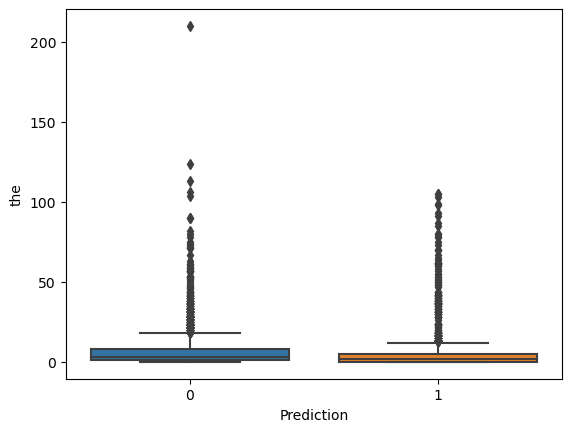

In [12]:
sns.boxplot(x="Prediction", y= "the",data=df);  

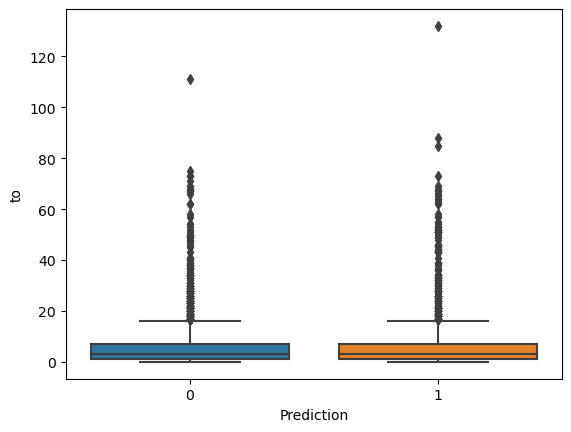

In [13]:
sns.boxplot(x="Prediction", y= "to",data=df);  

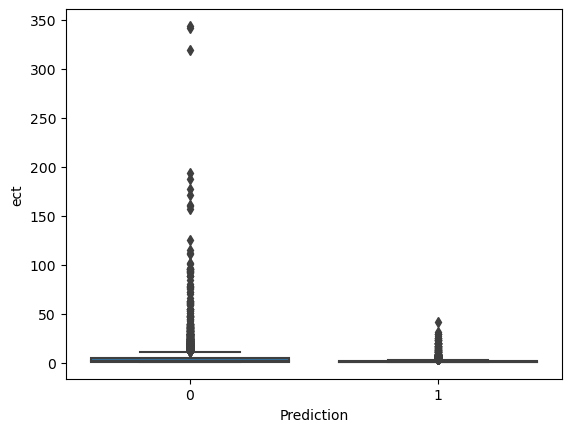

In [14]:
sns.boxplot(x="Prediction", y= "ect",data=df);  

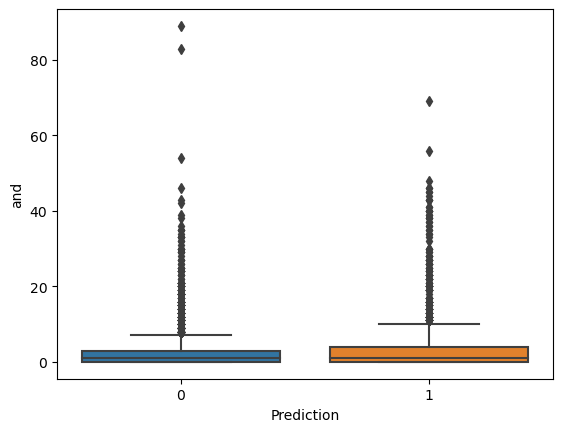

In [15]:
sns.boxplot(x="Prediction", y= "and",data=df);  

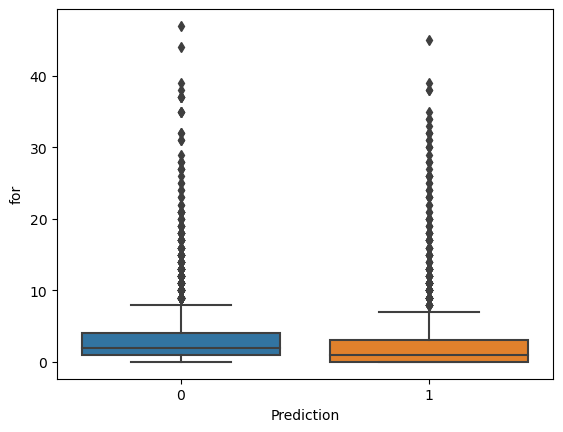

In [16]:
sns.boxplot(x="Prediction", y= "for",data=df);  

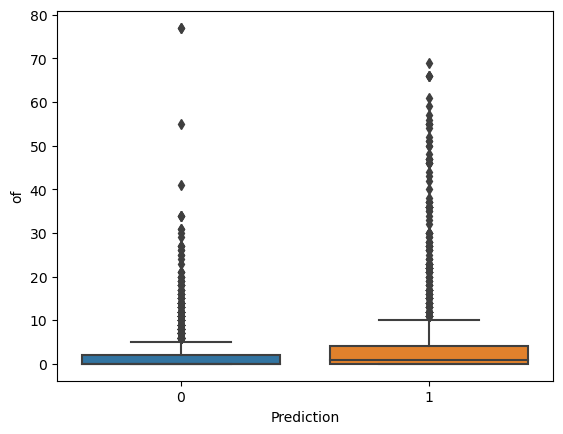

In [17]:
sns.boxplot(x="Prediction", y= "of",data=df);  

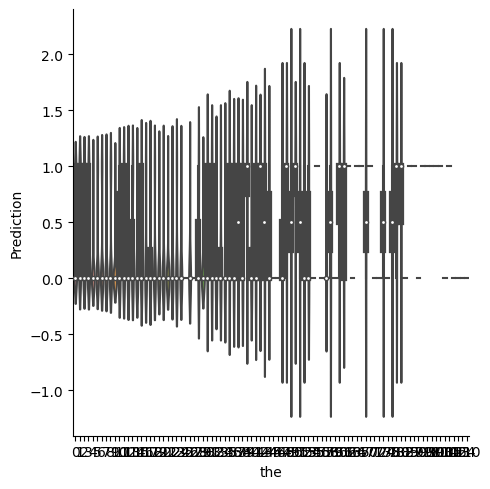

In [18]:
sns.catplot (x="the",y="Prediction", kind="violin",data=df)

In [19]:
# email numarası olan sütunu uçurdum.
df.drop(columns=['Email No.'],inplace=True)

/var/folders/sp/rfw320zd02bc_75vzf9c15z40000gq/T/ipykernel_1026/3794677811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/sp/rfw320zd02bc_75vzf9c15z40000gq/T/ipykernel_1026/3794677811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/sp/rf

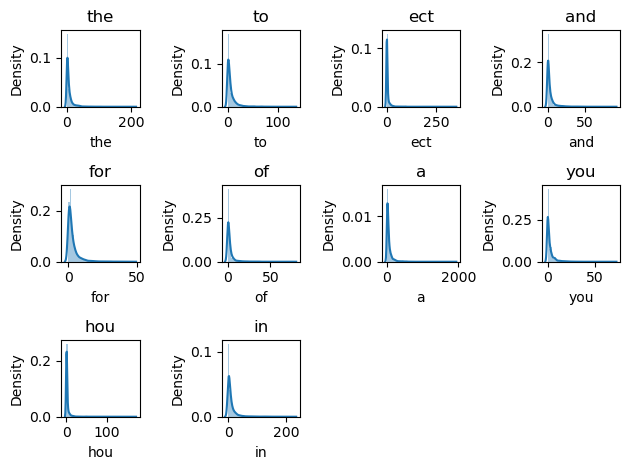

In [20]:
for i, column in enumerate(df.columns[:10]):
    plt.subplot(3, 4, i+1)  # 3 satır, 4 sütunlu bir alt grafik düzeni
    sns.distplot(df[column])
    plt.title(column)

plt.tight_layout() 
plt.show()

In [21]:
def pie_plot (column_name):
    plt.pie(df[column_name].value_counts(),labels = df[column_name].value_counts().index, shadow = True,autopct = "%1.1f%%")
    plt.show()

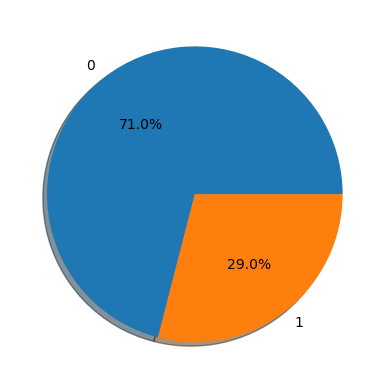

In [22]:
pie_plot ("Prediction")

In [23]:
df1 =df.copy()

In [24]:
y = df1["Prediction"]
X = df1.drop(["Prediction"], axis = 1) 

In [25]:
# Eğitim ve Test Setlerinin Oluşturulması;
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)  

### SVR Model

In [26]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [27]:
svm_params = {"C":[20,35,50,70,90,110]} # büyük C değerleri, sınıflar arasındaki hataların cezalandırılmasını arttırarak modelin eğitim verilerinin daha fazla uymasını sağlar.Ancak çok büyük C değerleri, underfittige sebebiyet verir.
svm_cv_model = GridSearchCV(estimator=svm, param_grid=svm_params, cv = 5 ).fit(X_train,y_train)

In [28]:
svm_cv_model.best_params_

{'C': 110}

In [29]:
svm_model = SVC(C=90).fit(X_train, y_train)

In [30]:
y_pred_svm = svm_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_svm))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_svm))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_svm)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_svm))

MAE ortalama mutlak hata : 0.04059278350515464


MSE ortalama hata karesi : 0.04059278350515464


RMSE ortalama karekök sapması : 0.20147650856900076


R2 Score (Değişkenlik oranı :) 0.8041091087581516


### Ramdom Forest Model

In [31]:
rf_model = RandomForestClassifier(random_state = 42).fit(X_train,y_train)
rf_params = {"max_depth": [70,85],
             "max_features": [40,50],
             "n_estimators": [500,750],
             "min_samples_split": [2,5]}

In [32]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 5, n_jobs=-1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [33]:
rf_cv_model.best_params_

{'max_depth': 70,
 'max_features': 50,
 'min_samples_split': 2,
 'n_estimators': 500}

In [34]:
rf_model = RandomForestClassifier(random_state = 42,
                                 max_depth =70,
                                 max_features =50,
                                 min_samples_split = 2,
                                 n_estimators = 500)
rf_tuned = rf_model.fit(X_train, y_train)


In [35]:
y_pred_rf = rf_tuned.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_rf))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_rf))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_rf)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_rf))

MAE ortalama mutlak hata : 0.02384020618556701


MSE ortalama hata karesi : 0.02384020618556701


RMSE ortalama karekök sapması : 0.15440274021391917


R2 Score (Değişkenlik oranı :) 0.8849529686357398


#### GBM (Gradient Boosting Machines)

In [36]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [37]:
%%time
y_pred_gbm = gbm_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_gbm))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_gbm))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_gbm)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_gbm))

MAE ortalama mutlak hata : 0.03414948453608247


MSE ortalama hata karesi : 0.03414948453608247


RMSE ortalama karekök sapması : 0.18479579144580774


R2 Score (Değişkenlik oranı :) 0.8352029010187625
CPU times: user 14.6 ms, sys: 3.43 ms, total: 18 ms
Wall time: 17.1 ms


#### XGB

In [38]:
xgb = XGBClassifier()

In [39]:
xgb_params = {"learning_rate" : [0.1,0.01, 0.5], # overfittigi engellemek adına, öğrenme oranı hiperparametresi
              "max_depth": [20,30],
              "n_estimators": [500], #kullanılacak olan ağaç sayısını ifade eder.
              "colsample_bytree": [0.4,0.7]} # oluşturulan ağaçlardaki değişkenlerden alınacak olan alt küme oranı

In [40]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5, n_jobs = -1, verbose = 2). fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=70, max_features=40, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=70, max_features=40, min_samples_split=5, n_estimators=500; total time=   4.4s
[CV] END max_depth=70, max_features=50, min_samples_split=2, n_estimators=500; total time=   5.2s
[CV] END max_depth=70, max_features=50, min_samples_split=5, n_estimators=750; total time=   7.6s
[CV] END max_depth=85, max_features=40, min_samples_split=2, n_estimators=750; total time=   6.8s
[CV] END max_depth=85, max_features=50, min_samples_split=2, n_estimators=750; total time=   8.3s
[CV] END max_depth=85, max_features=50, min_samples_split=5, n_estimators=750; total time=   5.6s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=30, n_estimators=500; total time=  17.9s


/Users/utkuozkan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=70, max_features=40, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END max_depth=70, max_features=40, min_samples_split=5, n_estimators=750; total time=   6.6s
[CV] END max_depth=70, max_features=50, min_samples_split=5, n_estimators=500; total time=   5.1s
[CV] END max_depth=70, max_features=50, min_samples_split=5, n_estimators=750; total time=   7.5s
[CV] END max_depth=85, max_features=40, min_samples_split=5, n_estimators=500; total time=   4.5s
[CV] END max_depth=85, max_features=50, min_samples_split=2, n_estimators=500; total time=   5.5s
[CV] END max_depth=85, max_features=50, min_samples_split=5, n_estimators=750; total time=   6.7s
[CV] END colsample_bytree=0.4, learning_rate=0.1, max_depth=20, n_estimators=500; total time=  18.0s
[CV] END max_depth=70, max_features=40, min_samples_split=2, n_estimators=500; total time=   4.6s
[CV] END max_depth=70, max_features=40, min_samples_split=5, n_estimators=750; total time=   6.4s
[CV] END max_dept

In [41]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 30,
 'n_estimators': 500}

In [42]:
xgb_model = XGBClassifier(colsample_bytree = 0.4,
                        learning_rate = 0.01,
                        max_depth = 30,
                        n_estimators = 500).fit(X_train, y_train)

In [43]:
%%time
y_pred_xgb = xgb_model.predict(X_test)
print('MAE ortalama mutlak hata :', metrics.mean_absolute_error(y_test,y_pred_xgb))
print("\n")
print('MSE ortalama hata karesi :',metrics.mean_squared_error(y_test, y_pred_xgb))
print("\n")
print('RMSE ortalama karekök sapması :', np.sqrt(metrics.mean_absolute_error(y_test, y_pred_xgb)))
print("\n")
print('R2 Score (Değişkenlik oranı :)', metrics.r2_score(y_test, y_pred_xgb))

MAE ortalama mutlak hata : 0.023195876288659795


MSE ortalama hata karesi : 0.023195876288659795


RMSE ortalama karekök sapması : 0.15230192477004287


R2 Score (Değişkenlik oranı :) 0.8880623478618009
CPU times: user 378 ms, sys: 341 ms, total: 719 ms
Wall time: 102 ms


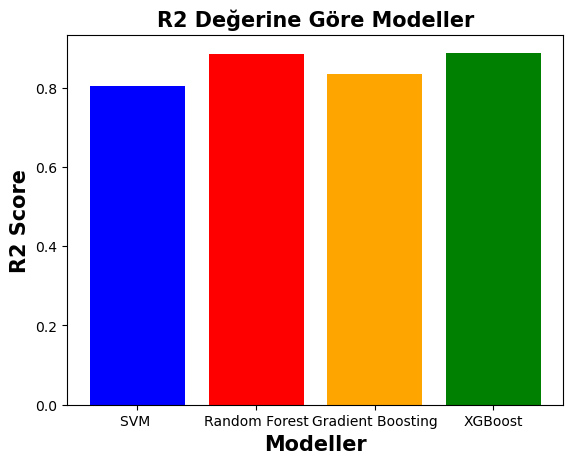

[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=20, n_estimators=500; total time=  15.7s
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=30, n_estimators=500; total time=  15.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=30, n_estimators=500; total time=  18.0s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=500; total time=  15.3s
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=20, n_estimators=500; total time=  15.9s
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=30, n_estimators=500; total time=  15.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=30, n_estimators=500; total time=  18.1s
[CV] END colsample_bytree=0.7, learning_rate=0.5, max_depth=20, n_estimators=500; total time=  15.4s
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=20, n_estimators=500; total time=  16.0s
[CV] END colsample_bytree=0.4, learning_rate=0.5, max_depth=30, n_estimators=500; total tim

In [44]:
svm_model_metrics = metrics.r2_score(y_test, y_pred_svm)
rf_tuned_metrics = metrics.r2_score(y_test, y_pred_rf)
gbm_model_metrics = metrics.r2_score(y_test, y_pred_gbm)
xgb_model_metrics = metrics.r2_score(y_test, y_pred_xgb)

models = ['SVM ', 'Random Forest', 'Gradient Boosting', 'XGBoost']
r2_scores = [svm_model_metrics, rf_tuned_metrics, gbm_model_metrics, xgb_model_metrics]

# Çubuk grafik oluşturma
plt.bar(models, r2_scores, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Modeller', fontweight='bold', fontsize=15)
plt.ylabel('R2 Score', fontweight='bold', fontsize=15)
plt.title('R2 Değerine Göre Modeller', fontweight='bold', fontsize=15)

# Grafik gösterme
plt.show()